In [1]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import tree
import mglearn

iris = sns.load_dataset('iris')

x = iris[['sepal_length', 'sepal_width']].values
y = iris['species'].values
adj_y = np.where(y=='setosa', 0, np.where(y=='versicolor', 1,2))

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

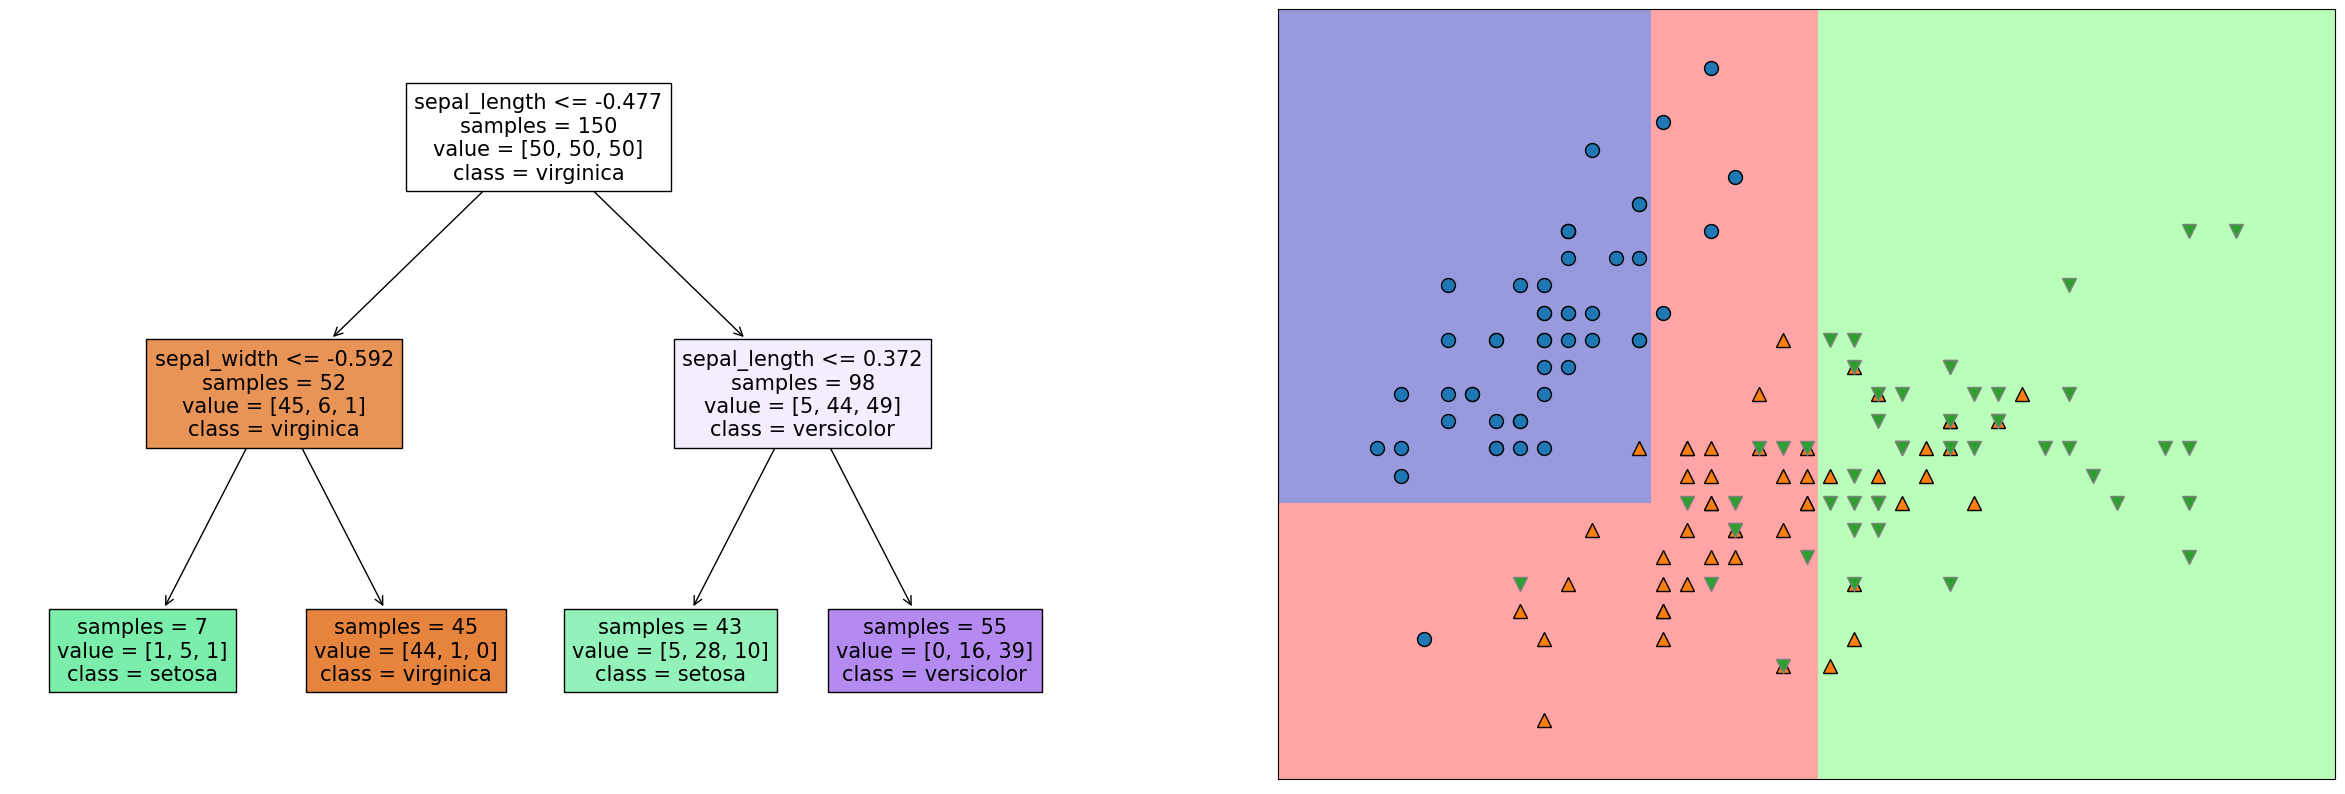

In [2]:
clf_2 = DecisionTreeClassifier(max_depth=2)
clf_2.fit(x, adj_y)

fig = plt.figure(figsize=(30,10))

ax = fig.add_subplot(1,2,1)
tree.plot_tree(clf_2, feature_names=['sepal_length', 'sepal_width'],
               class_names=list(set(y)), impurity=False, filled=True)

ax = fig.add_subplot(1,2,2)
mglearn.plots.plot_2d_classification(clf_2, x, fill=True, alpha=0.4)
mglearn.discrete_scatter(x[:,0],x[:,1], adj_y)

plt.show()

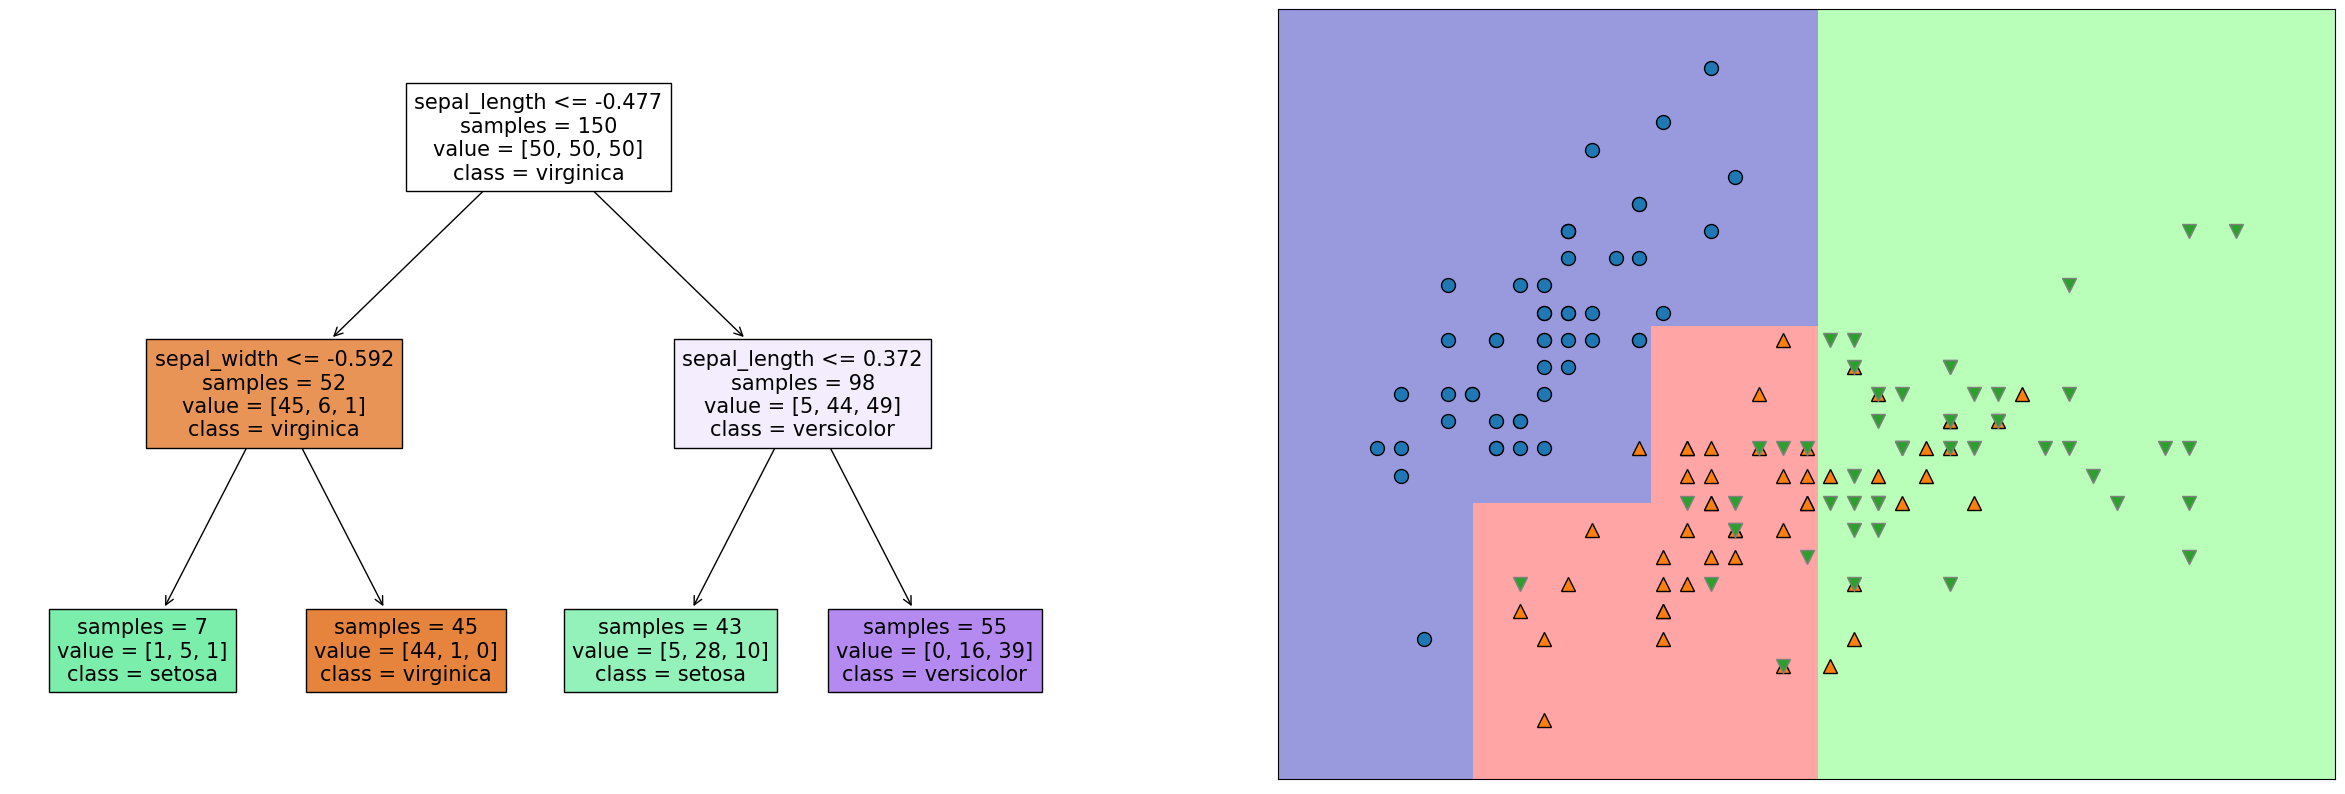

In [3]:
clf_3 = DecisionTreeClassifier(max_depth=3)
clf_3.fit(x, adj_y)

fig = plt.figure(figsize=(30,10))

ax = fig.add_subplot(1,2,1)
tree.plot_tree(clf_2, feature_names=['sepal_length', 'sepal_width'],
               class_names=list(set(y)), impurity=False, filled=True)

ax = fig.add_subplot(1,2,2)
mglearn.plots.plot_2d_classification(clf_3, x, fill=True, alpha=0.4)
mglearn.discrete_scatter(x[:,0],x[:,1], adj_y)

plt.show()

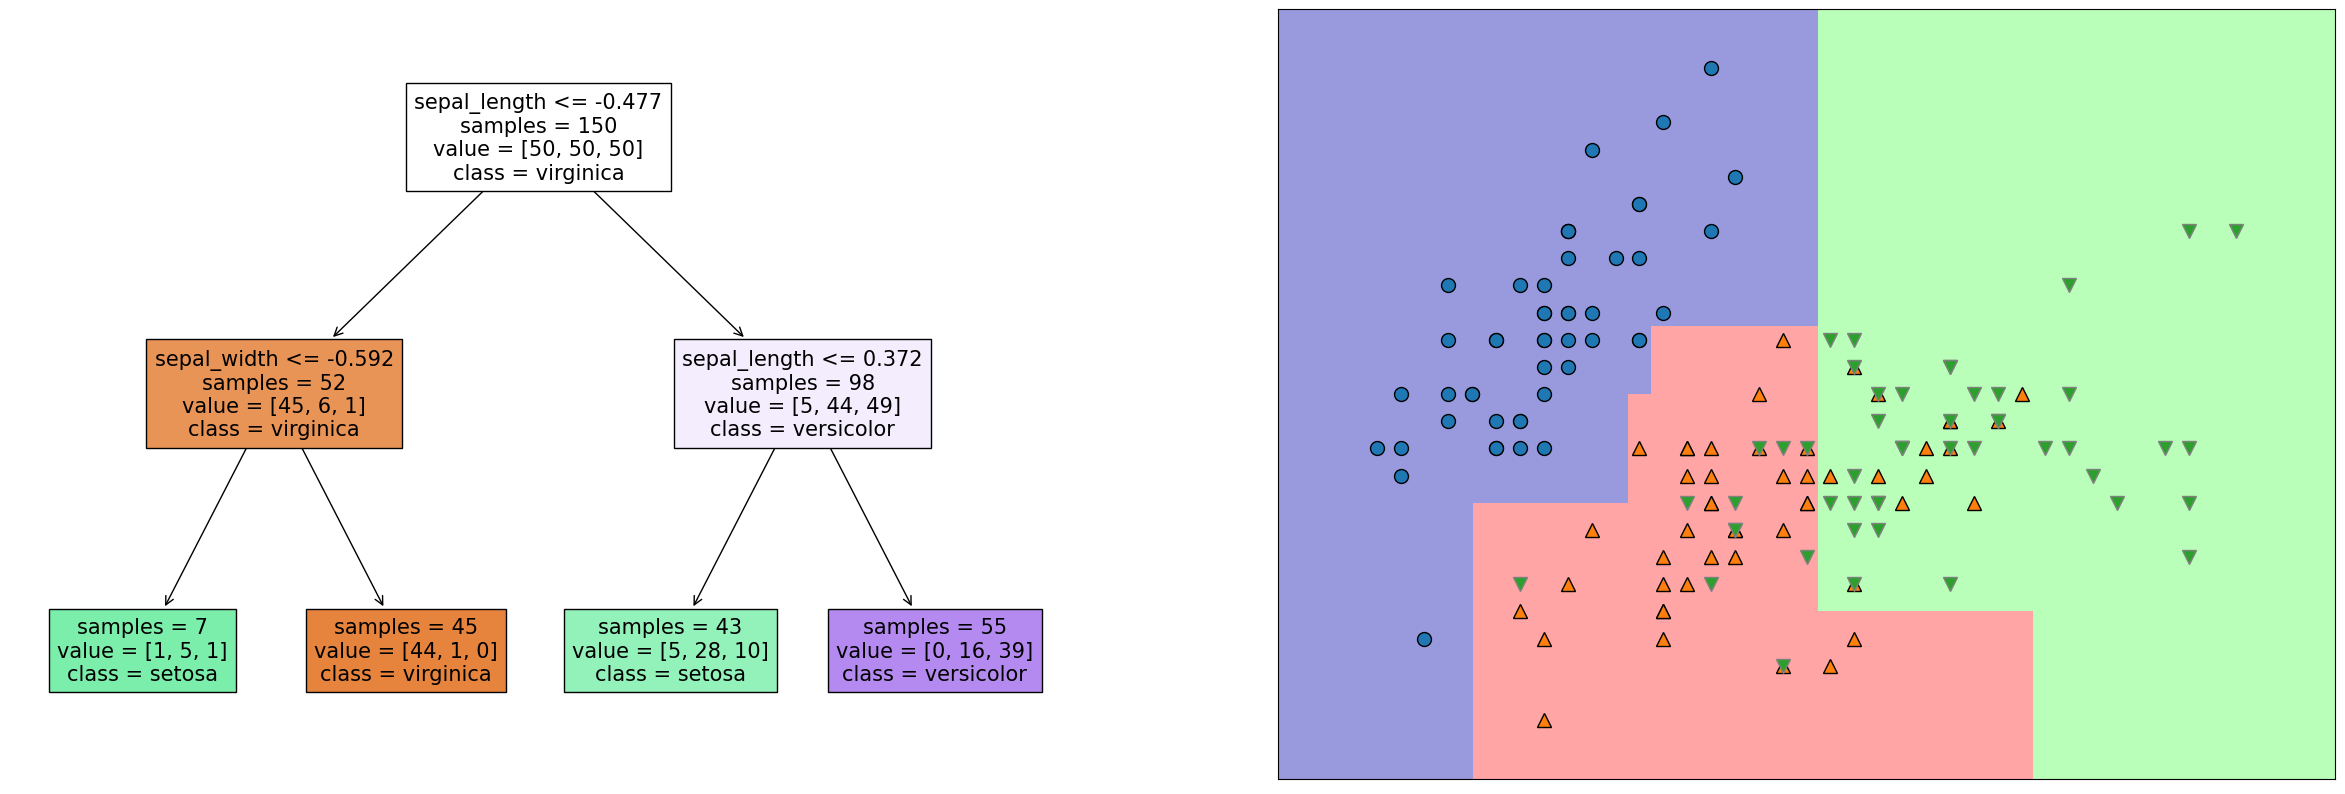

In [4]:
clf_4 = DecisionTreeClassifier(max_depth=4)
clf_4.fit(x, adj_y)

fig = plt.figure(figsize=(30,10))

ax = fig.add_subplot(1,2,1)
tree.plot_tree(clf_2, feature_names=['sepal_length', 'sepal_width'],
               class_names=list(set(y)), impurity=False, filled=True)

ax = fig.add_subplot(1,2,2)
mglearn.plots.plot_2d_classification(clf_4, x, fill=True, alpha=0.4)
mglearn.discrete_scatter(x[:,0],x[:,1], adj_y)

plt.show()

In [5]:
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
import matplotlib as mpl

def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None, labels=None, padding=0.2, alpha=1, c=None, markeredgewidth=None):
    if ax is None:
        ax = plt.gca()
    
    if y is None:
        y = np.zeros(len(x1))
    
    unique_y = np.unique(y)
    
    if markers is None:
        markers=['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', 'B', '<', '>'] * 10
        
    if len(markers) == 1:
        markers = markers * len(unique_y)
    
    if labels is None:
        labels = unique_y
    
    lines = []
    
    current_cycler = mpl.rcParams['axes.prop_cycle']
    
    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == y
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        
        if np.mean(colorConverter.to_rgb(color)) < 0.4:
            markeredgecolor = 'grey'
        else:
            markeredgecolor = 'black'
        
        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s, label=labels[i], alpha=alpha, c=color, markeredgewidth=markeredgewidth, markeredgecolor=markeredgecolor)[0])
    
    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))
    
    return lines

In [8]:
def plot_2d_classification(classifier, x, fill=False, ax=None, eps=None, alpha=1, cm=cm3):
    if eps is None:
        eps = x.std() / 2.
    
    if ax is None:
        ax = plt.gca()
    
    x_min, x_max = x[:, 0].min() - eps, x[:,0].max() + eps
    y_min, y_max = x[:, 1].min() - eps, x[:,1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    
    x1, x2 = np.meshgrid(xx, yy)
    x_grid = np.c_[x1.ravel(), x2.ravel()]
    decision_values = classifier.predict(x_grid)
    ax.imshow(decision_values.reshape(x1.shape), extent=(x_min, x_max, y_min, y_max), aspect='auto', origin='lower', alpha=alpha, cmap=cm)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

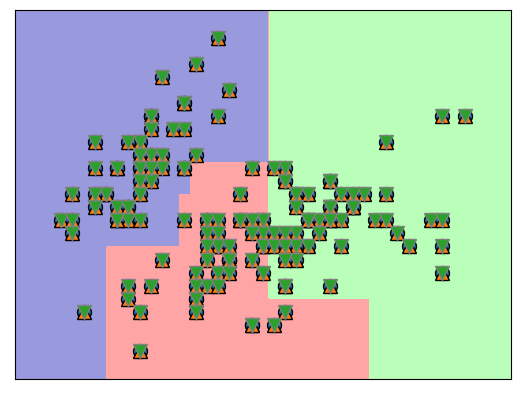

In [14]:
plot_2d_classification(clf_4, x, fill=True, alpha=0.4)
discrete_scatter(x[:,0],x[:,1], adj_y)